In [1]:
import numpy as np
import re
import scipy.spatial, scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1

In [2]:
sentences = []
words = {}

with open("data/sentences.txt") as inp:
    for line in inp:
        line = [l for l in re.split("[^a-z]", line.lower()) if l]
        sentences.append(line)
        for word in line:
            if word in words: continue
            words[word] = len(words)

word_matrix = np.zeros((len(sentences), len(words)))

for n, line in enumerate(sentences):
    for word in line:
        j = words[word]
        word_matrix[n, j] += 1
        
dists = [scipy.spatial.distance.cosine(word_matrix[0], word_matrix[s]) for s in range(len(word_matrix))]
dists = np.array(dists).argsort()

with open("submit/w2t1.txt", "w") as out:
    out.write(str(dists[1]) + " " + str(dists[2]))

In [4]:
!cat submit/w2t1.txt

6 4

### Task 2

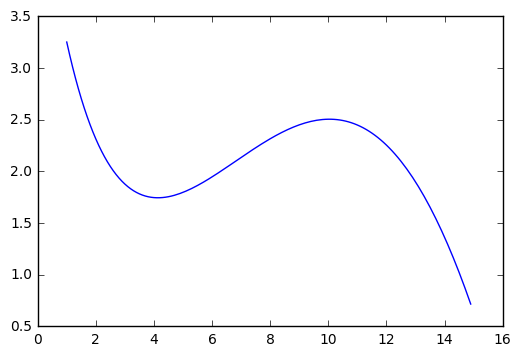

In [5]:
def f(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x / 2.)

x = np.arange(1, 15, 0.1)
y_true = f(x)
plt.plot(x, y_true);

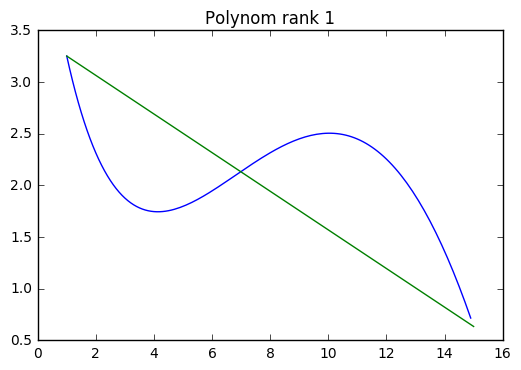

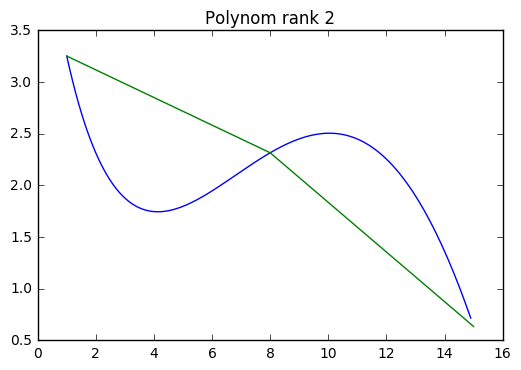

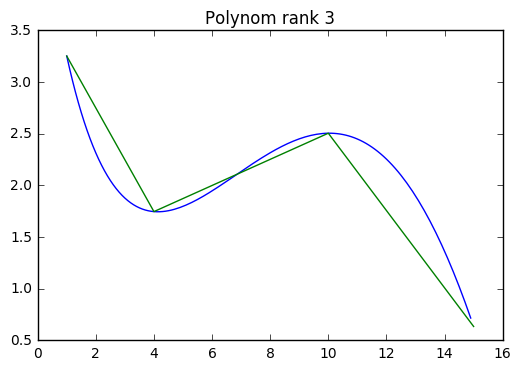

In [6]:
polys = [(1, 15), (1, 8, 15), (1, 4, 10, 15)]

for x_pts in polys:
    polynom_rank = len(x_pts) - 1
    A = [[pt**n for n in range(polynom_rank + 1)] for pt in x_pts]
    b = [f(pt) for pt in x_pts]
    wght = scipy.linalg.solve(A, b)
    y_pts = [sum([pt**n * w for n, w in enumerate(wght)]) for pt in x_pts]
    
    plt.title("Polynom rank %s" % polynom_rank)
    plt.plot(x, y_true)
    plt.plot(x_pts, y_pts)
    plt.show()

In [7]:
answer = map(lambda x: str(x.round(2)), wght)
with open("submit/w2t2.txt", "w") as out:
    out.write(" ".join(answer))

In [8]:
!cat submit/w2t2.txt

4.36 -1.3 0.19 -0.01